In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

import skeletor as sk
from skeletor.data import loadTestDataset
from skeletor.utils import angularHistogramAroundPoint

from skeletor.utils import approxPeakFind
from scipy.signal import find_peaks

from pepe.topology import findPeaksMulti, findPeaks1D, findPeaks2D

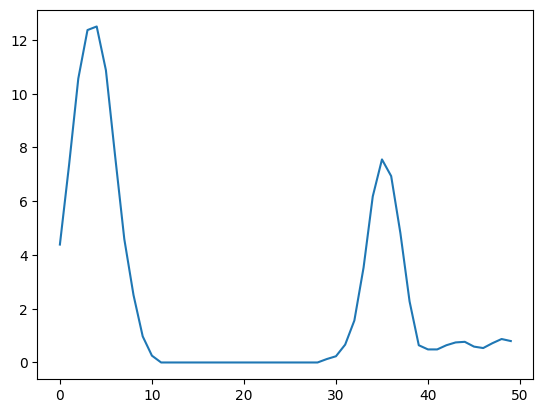

In [2]:
# Some data to test on
points = loadTestDataset('2d_curve_2', extraNoise=.02)
testPoint = 25
neighborDistance = 0.1

hist, axes = angularHistogramAroundPoint(points, testPoint, neighborDistance=neighborDistance)

plt.plot(hist)
plt.show()

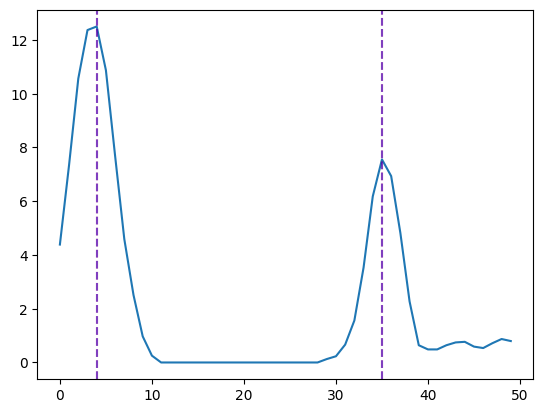

In [3]:
peaks = find_peaks(hist, prominence=0.5)[0]
approxPeaks, prevalences = findPeaks1D(hist, minPeakPrevalence=.1, periodic=False)

plt.plot(hist)
for i in peaks:
    plt.axvline(i, linestyle='--', c='red', alpha=.5)

for i in approxPeaks:
    plt.axvline(i, linestyle='--', c='blue', alpha=.5)

plt.show()

In [8]:
np.array([1, 2, 3]) % np.array([2, 2, 3])

array([1, 0, 0])

In [4]:
%timeit findPeaks1D(hist, minPeakPrevalence=0.6)
%timeit findPeaksMulti(hist, minPeakPrevalence=0.6)

3.66 µs ± 75.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
1.4 ms ± 27.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


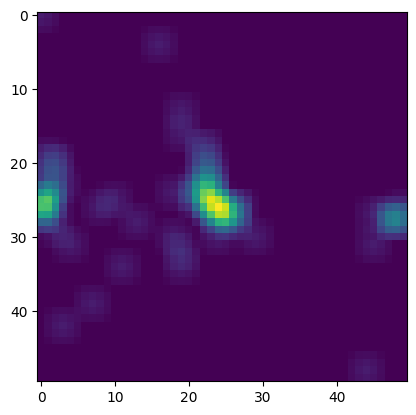

In [20]:
# Some data to test on
points = loadTestDataset('wireframe_cube_1', extraNoise=.005)
testPoint = 100
neighborDistance = 0.1

hist, axes = angularHistogramAroundPoint(points, testPoint, neighborDistance=neighborDistance)

plt.imshow(hist)
plt.show()

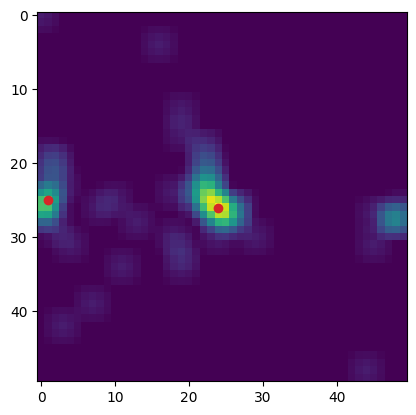

In [26]:
peaks, prevalences = findPeaks2D(hist, minPeakPrevalence=.6, periodic=False)

plt.imshow(hist)
plt.scatter(*peaks.T[::-1], c='tab:red')
plt.show()

In [14]:
%timeit findPeaks2D(hist, minPeakPrevalence=0.6)
%timeit findPeaksMulti(hist, minPeakPrevalence=0.6)
%timeit approxPeakFind(hist)

7.2 ms ± 94.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.64 ms ± 173 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
36.8 ms ± 585 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
findPeaksMulti(hist, minPeakPrevalence=0.6, allowOptimize=True)

(array([[23, 38],
        [24, 12],
        [17, 13],
        [15, 36]]),
 array([1.        , 0.83808804, 0.77010773, 0.61665815]))